In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import t, norm
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('D:\heart_disease.csv')


In [4]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Question 1
Classify the features in the Heart Disease dataset into their appropriate data
 types (ordinal, nominal, interval, or ratio). Provide a rationale for each
 classification.
# Answer
Nominal: id, origin, sex, fbs, restecg, exang
Rationale - they are all features that don’t have any ranking or order in specific 
Ordinal: cp, slope, ca, thal, num
Rationale - they have a specific ordering but the differences between them are not quantifiable.
Interval: oldpeak
Rationale - numeric features in which the differences between the values is interval measured on a scale of equal-sized units and there does not exist a meaningful zero 
Ratio: age, trestbps, chol, thalach
Rationale - these are variables where zero represents the complete absence of the attribute.


# Question 2
Asummary statistic provides a numerical summary of a specific feature within
 the dataset.There are two commonly used categories of summary statistics:
 those that indicate the central tendency and those that indicate the spread of the
 data. Identify the most appropriate measure of central tendency for each attribute
 in the dataset and state its corresponding value. Additionally, calculate the
 standard deviation and range of values for each column

 # Answer 2
 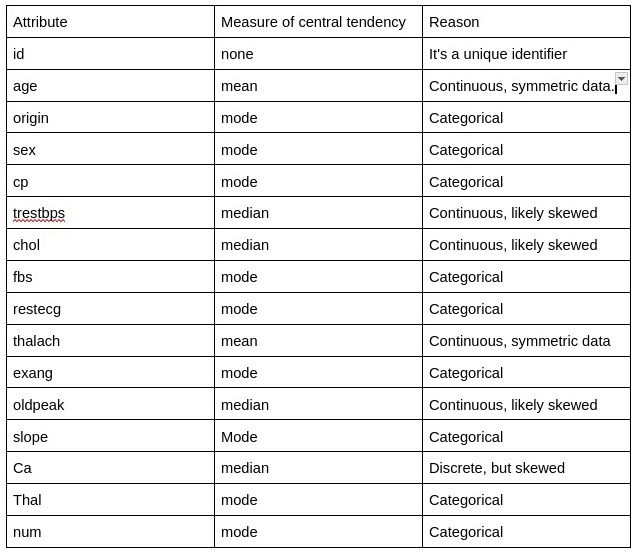

In [14]:
print("descriptive statistics" ) 
print(df.describe())

descriptive statistics
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.

In [13]:
print("datatypes") 
print(df.dtypes)

datatypes
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


# Question 3
 Identify and describe any data quality issues or inconsistencies within the Heart
 Disease dataset. What steps would you take to clean and preprocess the data to
 ensure its accuracy and reliability for further analysis?

# Answer
 Ensuring data quality is essential for making accurate predictions and drawing valid conclusions. The data quality issues in the heart disease csv file are the following 
Missing Data (Null or NaN values)
Outliers
To clean and preprocess the data (to ensure its accuracy), we need to fill the missing values with the average of the other values of that particular attribute. If missing values are still prevalent, we drop that column/row. 

In [26]:
print("since the dataset contains NUll values , we must drop those cells.")

df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
df['thalch'].fillna(df['thalch'].mean(),inplace=True)
df['exang'].fillna(df['exang'].mean(),inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)



print("dataframe after filling missing values ")
print(df)

df_clean = df.dropna()
print(df_clean)

since the dataset contains NUll values , we must first drop those cells and fill the cells up with the mean values.
dataframe after filling missing values 
      id  age     sex        dataset               cp    trestbps   chol  \
0      1   63    Male      Cleveland   typical angina  145.000000  233.0   
1      2   67    Male      Cleveland     asymptomatic  160.000000  286.0   
2      3   67    Male      Cleveland     asymptomatic  120.000000  229.0   
3      4   37    Male      Cleveland      non-anginal  130.000000  250.0   
4      5   41  Female      Cleveland  atypical angina  130.000000  204.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920

C:\Users\Anurag\AppData\Local\Temp\ipykernel_7880\1998250915.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
C:\Users\Anurag\AppData\Local\Temp\ipykernel_7880\1998250915.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# Question 4
Using a histogram and box plot, assess the presence of outliers in the 'age' and
'chol' variables. Describe the visualizations, identify any potential outliers, and
explain how you determined their presence or absence.

# Answer
There are outliers visible after plotting the histogram and boxplot. The potential outliers would be data such as age being greater than hundred which is close to impossible as the average lifespan is 70-75 years. Another potential outlier would be the cholesterol levels that exceed the average level(250mg/dL)

for outliers


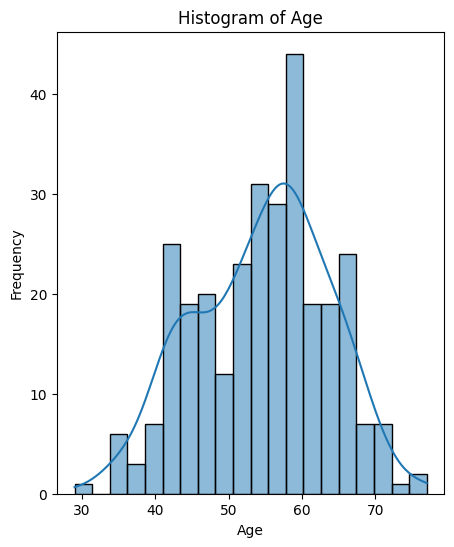

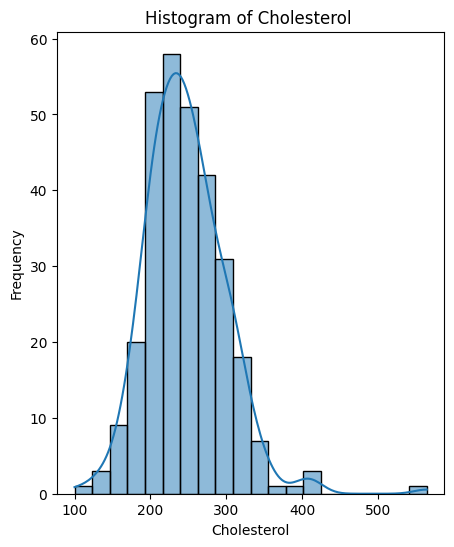

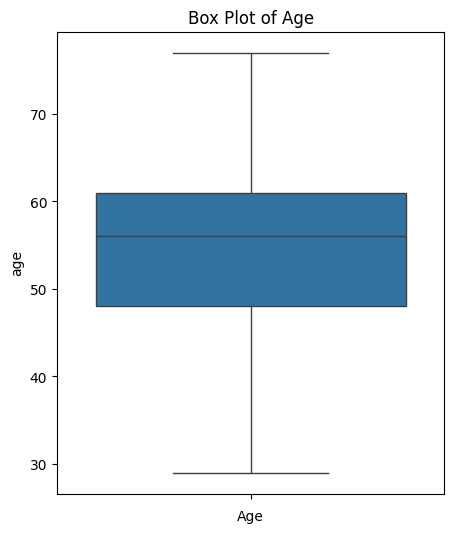

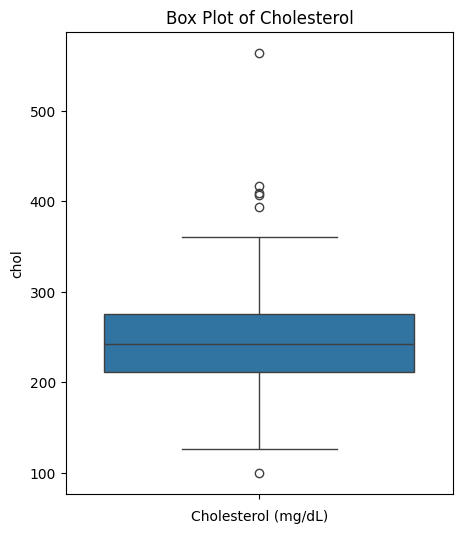

In [37]:
print("for outliers" ) 

# age histogram
plt.figure(figsize=(5,6)) 
sns.histplot(df_clean['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# cholestrol histogram
plt.figure(figsize=(5,6)) 
sns.histplot(df_clean['chol'], bins=20, kde=True)
plt.title('Histogram of Cholesterol ')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

# age boxplots
plt.figure(figsize=(5, 6))
sns.boxplot(df_clean['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


# cholesterol boxplots
plt.figure(figsize=(5, 6))
sns.boxplot(df_clean['chol'])
plt.title('Box Plot of Cholesterol')
plt.xlabel('Cholesterol (mg/dL)')
plt.show()

#  Question 5
What actions would you take to resolve the presence of outliers? Visualize the
changes using box plots and histograms
# Answer
The presence of the outliers is identified using the iqr method and then resolved by deleting the row.

In [40]:
#age
# outlier range for age using IQR method  
Q1 = df_clean['age'].quantile(0.25)
Q3 = df_clean['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_age_out = df_clean[(df_clean['age'] >= lower_bound) & (df_clean['age'] <= upper_bound)]
print("\nDataFrame without no age outliers:")
print(df_no_age_out)


#cholestrol
Q1 = df_clean['chol'].quantile(0.25)
Q3 = df_clean['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_out = df_clean[(df_clean['chol'] >= lower_bound) & (df_clean['chol'] <= upper_bound)]
print("\nDataFrame without no chol outliers:")
print(df_no_out)


DataFrame without no age outliers:
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
299  300   68    Male      Cleveland     asymptomatic     144.0  193.0   True   
300  301   57    Male      Cleveland     asymptomatic     130.0  131.0  False   
301  302   57  Female      Cleveland  atypical angina     130.0  236.0  False   
508  509   47    Male        Hungary     asymptomatic     150.0  226.0  False   
748  749   56    Male  VA Long Beach     asymptomatic     120.0  100.0  F

In [42]:
print("the dataframe with no outliers " ) 
print(df_no_out) 

the dataframe with no outliers 
      id  age     sex    dataset               cp  trestbps   chol    fbs  \
0      1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...        ...              ...       ...    ...    ...   
298  299   45    Male  Cleveland   typical angina     110.0  264.0  False   
299  300   68    Male  Cleveland     asymptomatic     144.0  193.0   True   
300  301   57    Male  Cleveland     asymptomatic     130.0  131.0  False   
301  302   57  Female  Cleveland  atypical angina     130.0  236.0  False   
508  509   47    Male    Hungary     asymptomatic     150.0  226.0  False   

            restecg  thalch  exang  oldpeak

# Question 6
Examine the normal probability plot (Q-Q plot) for the 'chol' variable in the Heart
Disease dataset. Based on the shape and trend of the plot, what conclusions can
be drawn? Provide a rationale for your conclusions.
# Answer
Since there is a linear relationship(after cleaning the values), this indicates that the data follows a normal distribution  


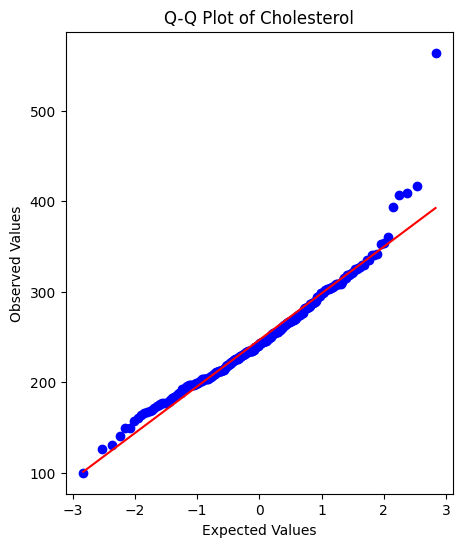

In [46]:
# Q-Q Plot
plt.figure(figsize=(5, 6))
stats.probplot(df_clean['chol'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Cholesterol')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')
plt.show()

# since there is a linear relationship, this indicates that the data does follow a normal distribution. 

# Question 7 
Calculate the correlation between 'Age' and all the other numerical variables
(e.g., 'trestbps' or 'thalach’'). Set a correlation threshold and create a heatmap to
visualize the relationships.

for age vs trestbps
Pearson Correlation Coefficient: 0.286, p-value: 0.00000
Weak positive correlation.
for age vs chol
Pearson Correlation Coefficient: 0.199, p-value: 0.00053
Weak positive correlation.
for age vs thalch
Pearson Correlation Coefficient: -0.384, p-value: 0.00000
Moderate negative correlation.


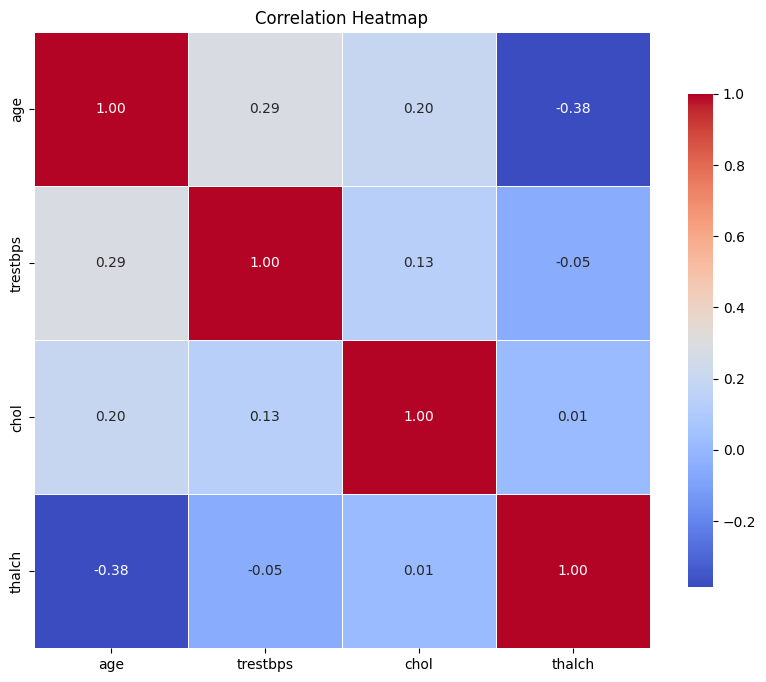

In [66]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def test_for_significance(pearson_corr,pearson_p): 
    if pearson_p < 0.05:  # Check for statistical significance
        if pearson_corr > 0:
            if pearson_corr <= 0.3:
                print("Weak positive correlation.")
            elif 0.3 < pearson_corr < 0.6:
                print("Moderate positive correlation.")
            elif pearson_corr >= 0.6:
                print("Strong positive correlation.")
        elif pearson_corr < 0:
            if pearson_corr >= -0.3:
                print("Weak negative correlation.")
            elif -0.6 < pearson_corr < -0.3:
                print("Moderate negative correlation.")
            elif pearson_corr <= -0.6:
                print("Strong negative correlation.")
        else:
            print("No correlation.")
    else:
        print("Correlation is not statistically significant.")

# trestbps
print("for age vs trestbps") 
pearson_corr_trestbps, pearson_p_trestbps = pearsonr(df_clean['age'], df_clean['trestbps'])
print(f"Pearson Correlation Coefficient: {pearson_corr_trestbps:.3f}, p-value: {pearson_p_trestbps:.5f}")
test_for_significance(pearson_corr_trestbps, pearson_p_trestbps)

# chol
print("for age vs chol") 
pearson_corr_chol, pearson_p_chol = pearsonr(df_clean['age'], df_clean['chol'])
print(f"Pearson Correlation Coefficient: {pearson_corr_chol:.3f}, p-value: {pearson_p_chol:.5f}")
test_for_significance(pearson_corr_chol, pearson_p_chol)


# thalch
print("for age vs thalch") 
pearson_corr_thalch, pearson_p_thalch = pearsonr(df_clean['age'], df_clean['thalch'])
print(f"Pearson Correlation Coefficient: {pearson_corr_thalch:.3f}, p-value: {pearson_p_thalch:.5f}")
test_for_significance(pearson_corr_thalch, pearson_p_thalch)

# Heatmap
correlation_matrix = df_clean[['age', 'trestbps', 'chol', 'thalch']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

# Question 8 
Generate a pairplot that includes the variables 'age', 'chol', and 'thalch' while
 using 'num' as the hue in the dataset. What insights can be gained from the
 pairplot, and how does it help in visualizing the relationships between the given
 features and heart disease prevalence?

 # Answer
 We can visualise how the relationships between ‘age’,’chol’ & ‘thalch’ change depending on the presence or absence of heart disease. 


<Figure size 1000x800 with 0 Axes>

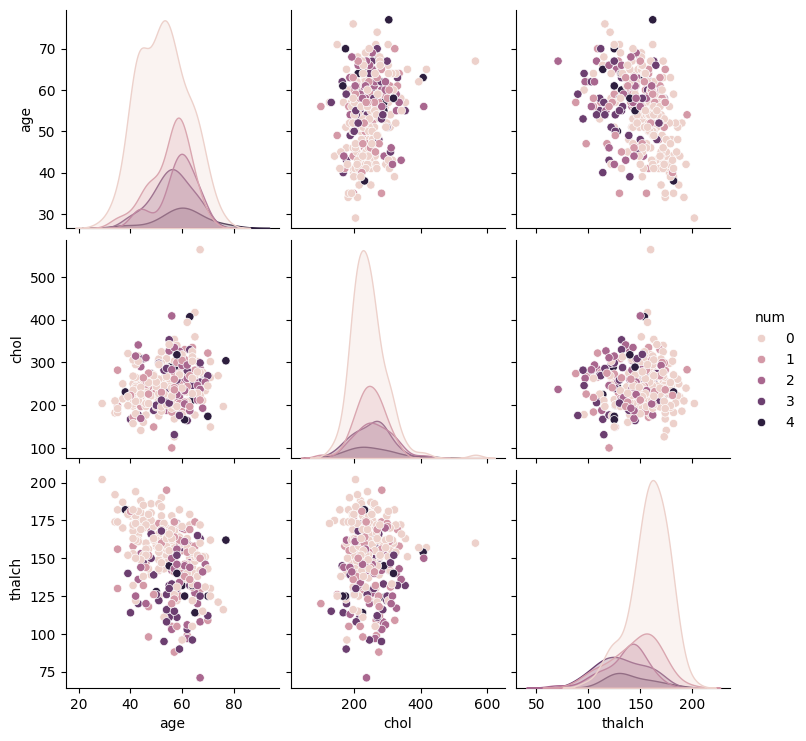

In [67]:
#pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df_clean, vars=['age', 'chol', 'thalch'], hue='num')
plt.show()

# Question 9
 Is there a statistically significant difference in the mean cholesterol levels
 between individuals with heart disease (num > 0) and those without heart
 disease (num = 0)? Formulate the null and alternative hypotheses, then conduct
 a T-test to examine this relationship. Additionally, plot a histogram to visualize the
 cholesterol distribution for each group. Use a significance level of 0.05.


 # Answer
 null_hypothesis = "There is no statistically significant difference in the mean cholesterol levels between individuals with heart disease and those without heart disease."
alternative_hypothesis = "There is a statistically significant difference in the mean cholesterol levels between individuals with heart disease and those without heart disease."

T-statistic: 1.1633
P-value: 0.2456


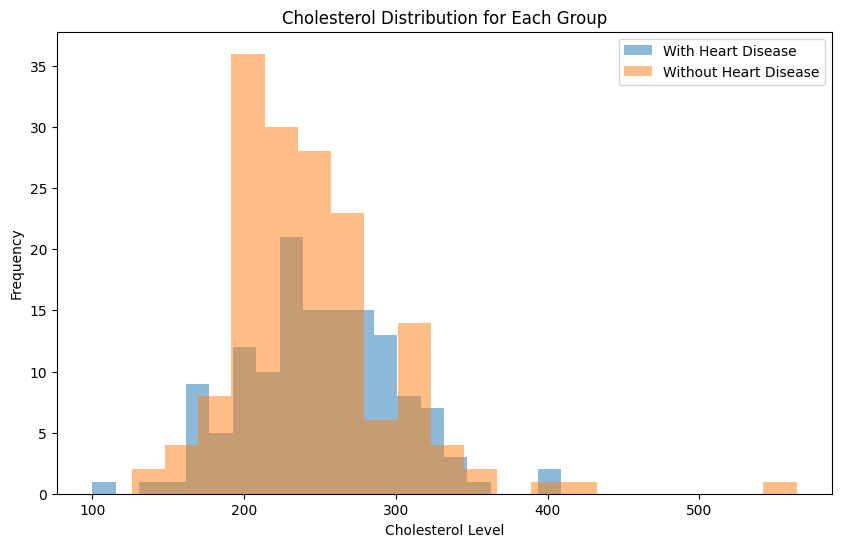

Fail to reject the null hypothesis.


In [75]:
df_with_hd = df_clean[df_clean['num'] > 0]
df_without_hd = df_clean[df_clean['num'] == 0]

# t test
t_stat, p_value = ttest_ind(df_with_hd['chol'], df_without_hd['chol'])

# Calculate the degrees of freedom
n1 = len(df_with_hd['chol'])
n2 = len(df_without_hd['chol'])
df = n1 + n2 - 2

# critical t-value
critical_t = t.ppf(0.975, df)

# standard error
std_err = np.sqrt((np.var(df_with_hd['chol']) / n1) + (np.var(df_without_hd['chol']) / n2))

# margin of error
margin_of_error = critical_t * std_err

# confidence interval
confidence_interval = (np.mean(df_with_hd['chol']) - np.mean(df_without_hd['chol'])) + np.array([-1, 1]) * margin_of_error


print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot histogram 
plt.figure(figsize=(10,6))
plt.hist(df_with_hd['chol'], bins=20, alpha=0.5, label='With Heart Disease')
plt.hist(df_without_hd['chol'], bins=20, alpha=0.5, label='Without Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution for Each Group')
plt.legend()
plt.show()

# Determine if the difference is statistically significant
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



# Question 10
calculate the margin of error to quantify the precision of the analysis done
 previously and infer what you can deduce from the results.

# Answer
From the results, we can deduce that we can be 95 percent confident that the treu mean difference in cholestrol levels between individuals with heart diseases and those without heart disease is greater than 0. This basically suggests that individuals with heart diseases have higher cholestrol levels. 



In [76]:
# Calculate the degrees of freedom
n1 = len(df_with_hd['chol'])
n2 = len(df_without_hd['chol'])
df = n1 + n2 - 2

# critical t-value
critical_t = t.ppf(0.975, df)

# standard error
std_err = np.sqrt((np.var(df_with_hd['chol']) / n1) + (np.var(df_without_hd['chol']) / n2))

# margin of error
margin_of_error = critical_t * std_err

print(f"Standard Error: {std_err:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")

Standard Error: 6.0447
Margin of Error: 11.8958


# Question 11
Perform a linear regression analysis to predict the variable chol (cholesterol level)
 using the features age, trestbps (resting blood pressure), thalch (maximum heart rate
 achieved), oldpeak (ST depression induced by exercise), ‘ca’ (number of major vessels),
 and ‘num’ (Diagnosis of heart disease). Validate the model using performance metrics like
 RMSE, MSE, and R-squared values to assess the model's effectiveness.

MSE: 2293.5371
RMSE: 47.8909
R-squared: 0.0563


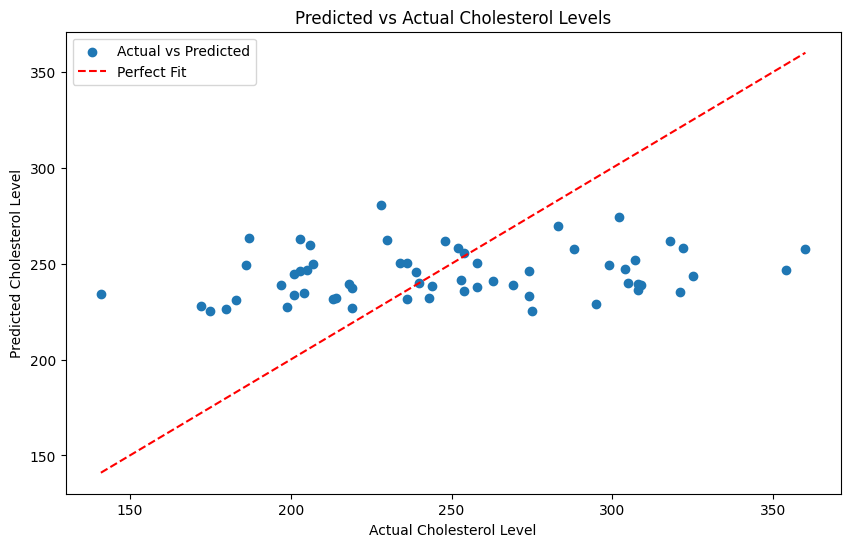

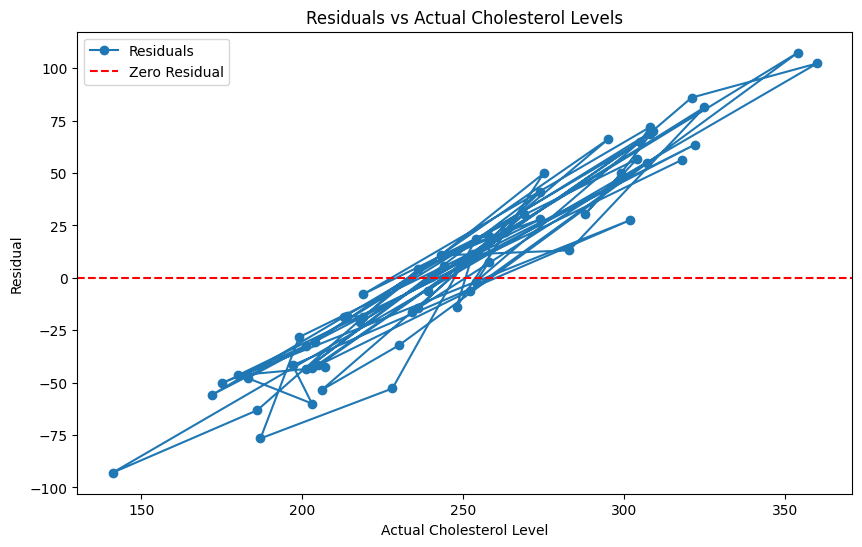

In [85]:



X = df_clean[['age', 'trestbps', 'thalch', 'oldpeak', 'ca', 'num']]
y = df_clean['chol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Cholesterol Level')
plt.ylabel('Predicted Cholesterol Level')
plt.title('Predicted vs Actual Cholesterol Levels')
plt.legend()
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.plot(y_test, residuals, 'o-', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Cholesterol Level')
plt.ylabel('Residual')
plt.title('Residuals vs Actual Cholesterol Levels')
plt.legend()
plt.show()

# Question 12
To improve the model’s predictive power in assessing heart disease risk, consider
 what additional features could be engineered from the existing data. Explain what new
 variables you would create and why they could enhance the predictive accuracy of the
 model.

# Answer
new features to aim to enhance the model by providing more nuanced information about how various factors (age, cholesterol, blood pressure, exercise, chest pain, etc.) interact to influence heart disease risk such as bmi, heart rate recovery, heart rate to age ratio, cholestrol to blood pressure ratio and other such ratios and interactions.